In [412]:
import numpy as np
import math
from random import shuffle
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model, datasets, preprocessing

In [445]:
with open('wine.data.txt') as f:
    content = [[float(x) for x in line.strip().split(',')] for line in f.readlines()]
content = [i for i in content if i[0] != 3]
shuffle(content)
# trainingLabel = map(lambda x : -1 if x[0]==2 else x[0], content[:65])
# trainingData = map(lambda x : x[1:]+[1], content[:65])
testLabel = map(lambda x : -1 if x[0] ==2 else x[0], content[65:])
testData = map(lambda x : x[1:]+[1], content[65:])
trainingLabel = map(lambda x : -1 if x[0]==2 else x[0], content[:130])
trainingData = map(lambda x : x[1:]+[1], content[:130])

In [482]:
with open('wine.data.txt') as f:
    content = [[float(x) for x in line.strip().split(',')] for line in f.readlines()]
shuffle(content)
wineLabel = map(lambda x : -1 if x[0] == 1.0 else 1, content[:130])
wineData = np.array(list(map(lambda x : x[1:14], content[:130])))

In [483]:
wineData = (wineData-np.mean(wineData,axis = 0))/np.std(wineData,axis = 0)
#wineData = wineData/np.max(wineData, axis = 0)
offset=np.ones(130)
wineData = np.c_[wineData,offset]

In [484]:
trd = wineData
trl = list(wineLabel)

In [414]:
trl = list(trainingLabel)
trd = list(trainingData)
tel = list(testLabel)
ted = list(testData)

In [416]:
trd = (trd - np.mean(trd,axis = 0))/np.std(trd,axis = 0)

/Users/haofanwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [418]:
trd

array([[-0.81784764, -0.77355059, -1.35283386, ...,  0.13862352,
        -1.36148671,         nan],
       [ 0.60532715, -0.18033426,  0.23491391, ...,  1.08932411,
         0.36994445,         nan],
       [-1.30353427,  0.18472195,  1.484843  , ..., -1.0867239 ,
        -0.92293343,         nan],
       ..., 
       [-1.4616648 , -0.34004635,  0.94433312, ...,  0.54003044,
        -0.64954956,         nan],
       [-0.78396252, -0.27159831, -0.74476025, ...,  0.45552372,
        -0.79763249,         nan],
       [-1.68756556,  0.49273812,  0.26869578, ...,  0.92031067,
        -0.47014139,         nan]])

In [404]:
trd = trd/np.max(trd,0)
ted = ted/np.max(ted,0)

In [406]:
# logreg = linear_model.LogisticRegression(C = 1e5, solver = 'lbfgs', multi_class = 'multinomial')
logreg = linear_model.LogisticRegression(C = 1e6, fit_intercept = False)
logreg.fit(trd,trl)
Z = logreg.predict(trd)
errorRate = len(list(filter(lambda x: x[0] != x[1], zip(Z,trl))))*1.0/len(Z)
print (errorRate)

0.0


In [6]:
w_p = logreg.coef_
b_p = logreg.intercept_

In [7]:
def logistic_probability(X, w, Y):
    ret = []
    for i in range(len(X)):
        pr = -Y[i]*(np.dot(w,X[i]))
        pr = 1/ (np.exp(pr) + 1)
        ret.append(pr)
    return ret

In [8]:
def logistic_regression(X,w,Y):
    ret = 0
    for i in range(len(X)):
        temp = np.log(1+np.exp(-Y[i]*(np.dot(w,X[i]))))
        ret += temp
    return ret

In [9]:
def ll(X, w, Y):
    ret = []
    for i in range(len(X)):
        pr = Y[i]*(np.dot(w,X[i]))
        pr = 1/ (np.exp(pr) + 1)
        ret.append(pr)
    return ret

In [19]:
a = list(trd[0])
a = np.array([a])
b = a.T * a
# de1(trd, w, trl)

In [11]:
def de1(X,w,Y):
    p = logistic_probability(X,w,Y)
    p = [1 - n for n in p]
    ret = list(np.zeros(14))
    #f = logistic_regression(X,w,Y)
    for i in range(len(X)):
        temp = np.dot(Y[i],X[i])
        temp = np.dot(temp,p[i])
        ret = list(map(lambda x: x[0]+x[1], zip(ret, temp)))
    return ret

In [13]:
a = np.array([list(trd[0])])

In [14]:
def deri(X,w,Y):
    ret = np.zeros((14,14))
    for i in range(len(X)):
        temp = np.array([list(X[i])])
        temp = np.linalg.inv(temp.T * temp) + np.identity(14)
        #temp = np.dot(X[i],X[i])
        temp = temp * np.exp(-Y[i]*(np.dot(w,X[i])))
        temp = -temp / ((1 + np.exp(-Y[i]*(np.dot(w,X[i]))))*(1 + np.exp(-Y[i]*(np.dot(w,X[i])))))
        ret = ret + temp
    return ret

In [15]:
def newton(X, w, Y):
    p = logistic_probability(X,w,Y)
    p = [1 - n for n in p]
    ret = list(np.zeros(14))
    #f = logistic_regression(X,w,Y)
    for i in range(len(X)):
        temp = np.dot(Y[i],X[i])
        temp = np.dot(temp,p[i])
        #temp = f/temp
        ret = list(map(lambda x: x[0]+x[1], zip(ret, temp)))
    #ret = ret/f
    ret = ret/deri(X,w,Y)
    return ret

In [16]:
w = list(np.zeros(14))

In [20]:
def gradient(X, w, Y, alp):
    #p = ll(X,w,Y)
    p = logistic_probability(X,w,Y)
    p = [1 - n for n in p]
    ret = list(np.zeros(14))
    for i in range(len(X)):
        temp = np.dot(Y[i],X[i])
        temp = np.dot(temp,p[i])
        ret = list(map(lambda x: x[0]+x[1], zip(ret, temp)))
    ret = np.dot(ret,alp)
    return ret

In [21]:
# def conver2(X,w,Y):
#     los = []
#     los.append(logistic_regression(X,w,Y))
#     for i in range(50000):
#         gra = newton(X,w,Y)
#         ax = np.argmax(np.abs(gra))
#         lost_pre = logistic_regression(X,w,Y)
#         w[ax] += gra[ax]
#         #w[ax] -= gra[ax]
#         lost_cur = logistic_regression(X,w,Y)
#         los.append(lost_cur)
#         if(np.abs(lost_pre - lost_cur) < 1e-4):
#             break
#     return [lost_cur,los]





def conver2(X,w,Y):
    los = []
    los.append(logistic_regression(X,w,Y))
    #ax = 0
    for i in range(50000):
        gra = newton(X,w,Y)
        ax = np.argmax(np.abs(gra))
        lost_pre = logistic_regression(X,w,Y)
        w[ax] -= gra[ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
#         if ax == 13:
#             ax = 0
        if(np.abs(lost_pre - lost_cur) < 1e-4):
            break
    return [lost_cur,los]

In [143]:
w = list(np.zeros(14))
ret_conver2 = conver2(trd, w, trl)

In [144]:
ret_conver2[0]

1.6246417939411144

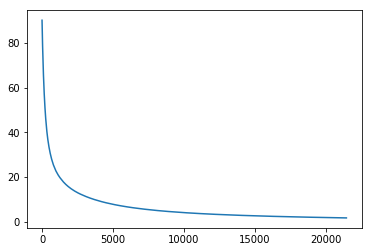

In [145]:
draw(ret_conver2)

In [150]:
def draw(ff):
    x= [i for i in range(len(ff[1]))]
    y= ff[1]

    plt.figure()
    plt.plot(x,y) 
    plt.show()
    # plt.xlabel("time(s)")  
    # plt.ylabel("value(m)")  
    # plt.title("A simple plot")  

In [633]:
def random_2(X,w,Y,alp):
    los = []
    los.append(logistic_regression(X,w,Y))
    for i in range(3000):
        gra = gradient(X,w,Y,alp)
        ax = random.randint(0,13)
        lost_pre = logistic_regression(X,w,Y)
        w[ax] += gra[ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
#         if(np.abs(lost_pre - lost_cur) < 1e-8):
#             break
    return [lost_cur,los, i]

In [634]:
w = list(np.zeros(14))
ret_ran = random_2(trd, w, trl, 0.25)

In [528]:
def conver(X,w,Y,alp):
    los = []
    los.append(logistic_regression(X,w,Y))
    for i in range(10000):
        gra = gradient(X,w,Y,alp)
        ax = np.argmax(np.abs(gra))
        lost_pre = logistic_regression(X,w,Y)
        w[ax] += gra[ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
        if(np.abs(lost_pre - lost_cur) < 1e-8):
            break
    return [lost_cur,los, i]

In [536]:
w = list(np.zeros(14))

In [537]:
ret_zero_one = conver(trd, w, trl, 0.25)

In [631]:
ret_ran[0]

0.49488651694426306

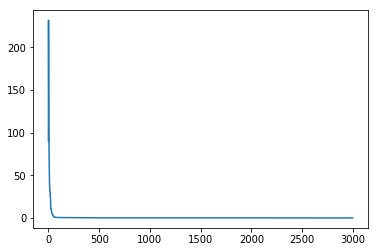

In [643]:
draw(ret_ran)

In [619]:
ret_zero_one[0]

0.0063831971239268846

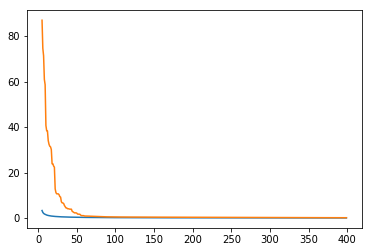

In [648]:
x= [i for i in range(5,400)]
y= ret_zero_one[1][5:400]
# y2 = [0.00759297]*(40 - 10)
yr = ret_ran[1][5:400]
plt.figure()
plt.plot(x,y)
# plt.plot(x,y2)
plt.plot(x,yr)
plt.plot()
plt.show()

In [63]:
ret = conver(trd, w, trl, 0.01)

In [64]:
ret[0]  #0.01

7.9139595018849329

In [534]:
ret_zero_one[0]

0.0097273638439942852

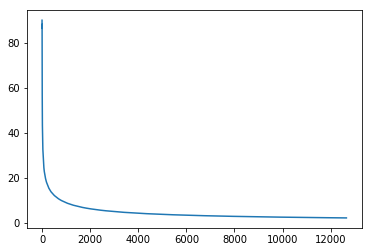

In [116]:
import numpy as np  
import matplotlib.pyplot as plt  

x= [i for i in range(len(ret_zero_one[1]))]
y= ret_zero_one[1]

plt.figure()
plt.plot(x,y)
plt.show()
# plt.xlabel("time(s)")  
# plt.ylabel("value(m)")  
# plt.title("A simple plot")  

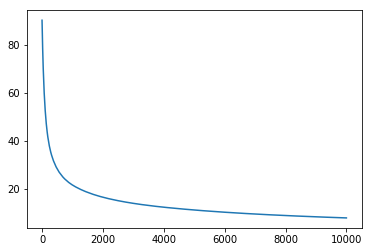

In [81]:
import numpy as np  
import matplotlib.pyplot as plt  
  
x= [i for i in range(10001)]
y= ret[1]
  
plt.figure()
plt.plot(x,y) 
plt.show()
# plt.xlabel("time(s)")  
# plt.ylabel("value(m)")  
# plt.title("A simple plot")  

In [114]:
w

[0.64606675792057611,
 9.0458603933608934,
 14.403004940239217,
 -16.27271724942818,
 0.0,
 0.0,
 0.30494595046834888,
 0.0,
 -0.55350092508224391,
 11.11528342686286,
 -1.3361442974499846,
 7.6538586783875786,
 28.098255919675683,
 -27.055067786285314]

In [49]:
def fit(X, w):
    ret = []
    for i in range(len(X)):
        pr = -(np.dot(w,X[i]))
        pr = 1/ (np.exp(pr) + 1)
        ret.append(pr)
    return ret

In [55]:
def getError(X,w):
    fi = fit(X,w)
    pr = []
    for i in fi:
        if i <= 0.5:
            pr.append(-1)
        else:
            pr.append(1)
    errorRate = len(list(filter(lambda x: x[0] != x[1], zip(pr,trl))))*1.0/len(pr)
    return errorRate

In [56]:
logistic_regression(trd,w,trl)

202.30487201169444

In [58]:
getError(trd,w)

0.45384615384615384

In [104]:
w_p

array([[ 38.99981167,  17.7706414 ,  48.81469621, -40.32456067,
          2.13747405,  -6.91529868,   7.12273034,  -4.01614505,
         -5.19484278,  14.33681114, -22.78991237,  15.0842625 ,
         63.67373528, -79.8880186 ]])

In [407]:
logistic_regression(trd, w_p,trl)

array([ 0.00759297])

In [61]:
np.dot(1,[1,2,3])

array([1, 2, 3])

In [22]:
# update_H(trl, w_diff, H)

In [98]:
w = list(np.zeros(14))
H = np.identity(14)
step_size = 0.1
I = np.identity(14)

In [96]:
g[1]

array([[ 0.20515846,  0.16025862,  0.2244582 ,  0.7195    ,  0.13549383,
        -0.09265464, -0.27775591,  0.65984848,  0.05153631, -0.60123596,
         0.36070175,  0.143125  , -0.86136905,  0.6       ]])

In [101]:
g = update(H, w, trd, trl)

In [102]:
k = update_H(g[0],g[1],H)

In [165]:
def update_H(g,w_diff,H):
    (I - (g * w_diff.T)/(g.T * w_diff)).T * H*(I - (g * w_diff.T)/(g.T * w_diff)) + w_diff*w_diff.T/(g.T*w_diff)
    return H
def update(H,w,X, y, step_size):
    w_cur=w
    w_diff_array=-step_size*np.dot(H,(np.array([de1(X,w,y)]).T))
    w_diff = list(w_diff_array[:,0])
    w=list(map(lambda x: x[0]+x[1], zip(w, w_diff)))
    g=np.array([de1(X,w,y)]).T-np.array([de1(X,w_cur,y)]).T
    return [g,w_diff_array.T,w]

In [142]:
def de1(X,w,Y):
    p = logistic_probability(X,w,Y)
    p = [1 - n for n in p]
    ret = list(np.zeros(14))
    #f = logistic_regression(X,w,Y)
    for i in range(len(X)):
        temp = np.dot(Y[i],X[i])
        temp = np.dot(temp,p[i])
        ret = list(map(lambda x: x[0]+x[1], zip(ret, temp)))
    return list(np.dot(-1,ret))

In [250]:
def conver_3(X,w,Y):
    los = []
    los.append(logistic_regression(X,w,Y))
    H = np.identity(14)
    step_size = 2
    I = np.identity(14)
    for i in range(5000):
        g = update(H,w,X,Y,step_size)
        #ax = np.argmax(np.abs(g[1]))
        lost_pre = logistic_regression(X,w,Y)
        w = g[2]
        #w[ax] += g[1][0][ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
        H = update_H(g[0],g[1],H)
        if(np.abs(lost_pre - lost_cur) < 1e-4):
            break
    return [lost_cur,los]

In [569]:
def conver_4(X,w,Y):
    los = []
    los.append(logistic_regression(X,w,Y))
    H = np.identity(14)
    step_size = 1.8
    I = np.identity(14)
    ax = 0
    for i in range(10000):
        g = update(H,w,X,Y,step_size)
        lost_pre = logistic_regression(X,w,Y)
        #w = g[2]
        w[ax] += g[1][0][ax]
        #w[ax] = g[2][ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
        H = update_H(g[0],g[1],H)
        if ax == 13:
            ax = 0
        else:
            ax = ax + 1
        if(np.abs(lost_pre - lost_cur) < 1e-10):
            break
    return [lost_cur,los]

In [570]:
w = list(np.zeros(14))
temp = conver_4(trd, w, trl) 
#step " 0.9 -> 50000 -> 0.05    0.05    1.5 ->0.0168  1.6:0.015
# 1.6, 80000, 0.010   100000 :  0.00865

In [571]:
temp[0]

0.0050447472743649843

In [544]:
temp[0]

0.0050447472743649843

In [309]:
# w = list(np.zeros(14))
# temp = conver_3(trd, w, trl)

In [350]:
my_ans = temp

In [248]:
temp[0] #1.6

0.065943261943750747

In [348]:
logistic_regression(trd, w,trl)

0.0069669009301348509

In [347]:
logistic_regression(trd, w_p,trl)

array([ 0.00759297])

In [339]:
temp[0]#[size = 0.5]

0.0069669009301348509

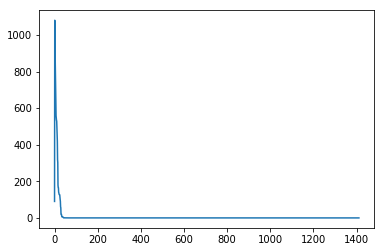

In [523]:
draw(temp)

In [360]:
tt = my_ans[1]

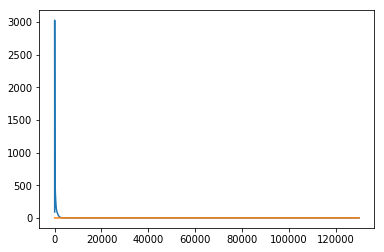

In [373]:
x= [i for i in range(130000)]
y= tt[:130000]
y2 = [0.00759297]*130000
plt.figure()
plt.plot(x,y)
plt.plot(x,y2)
plt.plot()
plt.show()

In [614]:
def draw(ff):
    x= [i for i in range(len(ff[1]))]
    y= ff[1]

    plt.figure()
    plt.plot(x,y) 
    plt.show()
    # plt.xlabel("time(s)")  
    # plt.ylabel("value(m)")  
    # plt.title("A simple plot")  

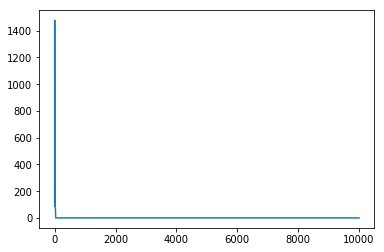

In [552]:
draw(ran)

In [580]:
def conver_random(X,w,Y):
    los = []
    los.append(logistic_regression(X,w,Y))
    H = np.identity(14)
    step_size = 1.8
    I = np.identity(14)
    for i in range(10000):
        g = update(H,w,X,Y,step_size)
        lost_pre = logistic_regression(X,w,Y)
        ax = random.randint(0,13)
        #w = g[2]
        w[ax] += g[1][0][ax]
        #w[ax] = g[2][ax]
        #w[ax] -= gra[ax]
        lost_cur = logistic_regression(X,w,Y)
        los.append(lost_cur)
        H = update_H(g[0],g[1],H)
        if(np.abs(lost_pre - lost_cur) < 1e-9):
            break
    return [lost_cur,los]

In [581]:
w = list(np.zeros(14))
ran = conver_random(trd, w, trl)

In [649]:
ran[0]

0.0062903030983713819

In [590]:
len(temp[1])

1412

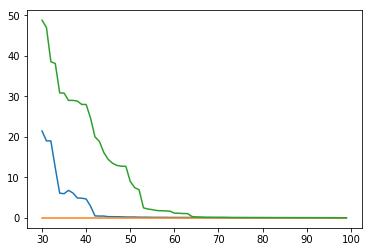

In [600]:
x= [i for i in range(30,100)]
y= temp[1][30:100]
y2 = [0.00759297]*(100 - 30)
yr = ran[1][30:100]
plt.figure()
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,yr)
plt.plot()
plt.show()

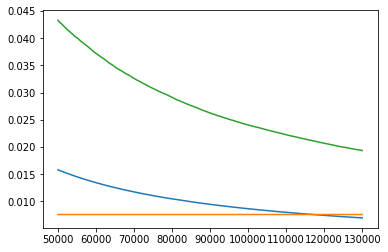

In [398]:
x= [i for i in range(50000,130000)]
y= tt[50000:130000]
y2 = [0.00759297]*(130000 - 50000)
yr = ran[1][50000:130000]
plt.figure()
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,yr)
plt.plot()
plt.show()

In [395]:
a = range(50000,130000)